----------------------------------
# Case Study: Factors Influencing Life Expectancy using **Linear Regression**
----------------------------------

## Context: 
    
- There have been lot of studies undertaken in the past, on factors affecting life expectancy, considering demographic variables, income composition and mortality rates.
- It was found that affect of immunization and human development index was not taken into account in the past.
- Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this case study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well.
- In this case study, we will use linear regression to see the effect of various factors on Life Expectancy.

------------------------------

## Problem:

**The data-set aims to answer the following key questions:**

- Does various predicting factors really affect the Life expectancy?
- What are the predicting variables actually affecting the life expectancy?
- Should a country having a lower life expectancy value increase its healthcare expenditure in order to improve its average lifespan?
- Do Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy has positive or negative correlation with a country's status (developing or developed), lifestyle, GDP,  etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have positive or negative relationship with drinking alcohol?
- What is the impact of Immunization coverage (for various disease like Measles,Hepatitis B) on life Expectancy?

------------------------------

## Attribute Information:

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)  -
- infant deaths: Number of Infant Deaths per 1000 population  +
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  +
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)  +
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)  +
- Measles: Measles - number of reported cases per 1000 population  -
- BMI: Average Body Mass Index of entire population  -
- under-five deaths: Number of under-five deaths per 1000 population  -
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)  +
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)  +
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)  +
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)  -
- GDP: Gross Domestic Product per capita (in USD)  +
- Population: Population of the country  - or No
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )  -
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)  -
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)   +
- Schooling: Number of years of Schooling(years)   +

------------------------
# Concepts to Cover
------------------------
- 1. <a href = #link1>Overview of the data</a>
- 2. <a href = #link2>Data Visualization</a>
- 3. <a href = #link3>Data Preparation</a>
- 4. <a href = #link4>Choose Model, Train and Evaluate</a>
- 5. <a href = #link5>Conclusion</a>
- 6. <a href = #link6>Add-on: Statsmodels</a>

# Let's start coding!

### Import libraries

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

### Load and explore the data

In [3]:
# Load the data into pandas dataframe
data = pd.read_csv('Life Expectancy Data.csv')              # Make changes to the path depending on where your data file is stored.

In [ ]:
#data_copy = data.copy()

# <a id='link1'>Overview of the data</a>

In [4]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Think about it:

- What do you interpret by looking at the data in the first 5 rows?
- Do you see that each column has different scales of data.
    - e.g. "Life expectancy" column : from 59.2 to 65.0, as we can see, in the first 5 rows.
    - Alcohol: 0.01
    - Measles: from 430 to 3013

    So, what do you think about the effect of the different scales (so features are 100 times of the other features, will the numerical values of features have any effect on the model?)

- The "Status" column has a value as "Developing", how to convert this text to numerical value?

In [5]:
# Check number of rows and columns
data.shape

(2938, 22)

In [6]:
# Have a look at the column names
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# Check column types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

## Think about it:

- What do you interpret from the different Dtype (data-type) shown here:
     - float64
     - int64
     - object

     How will we deal with the object data-type?

- We know that our dataset has 2938 rows of data.
- By looking at the above output of data.info(), we see that some columns are having less number of non-null values.
    - What does this mean?
        - It means some values are NULL (missing)

    How to deal with NULL (missing) values here?

 


In [8]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
# Check for columns with Missing Values
data.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
BMI                                 34
Thinness  1-19 years                34
Thinness 5-9 years                  34
Diphtheria                          19
Polio                               19
Adult Mortality                     10
Life expectancy                     10
Under-five deaths                    0
HIV/AIDS                             0
Measles                              0
Percentage expenditure               0
Infant deaths                        0
Status                               0
Year                                 0
Country                              0
dtype: int64

In [10]:
# First look at unknown values to have an understanding
data[data['Diphtheria'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,NaN,527.307672,NaN,0,55.7,0,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,NaN,0,55.0,0,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,NaN,0,54.2,0,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,NaN,0,53.5,0,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,NaN,0,52.7,0,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,NaN,0,51.9,0,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,NaN,41,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,NaN,42,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,NaN,42,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,NaN,43,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [228]:
data[data['Population'].isnull()]

,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Status_Developed


In [11]:
# Impute Missing Values (Be smart here) - Use different groups based on your understanding, and impute values accordingly
data['Population_Bucket'] = pd.qcut(data['Population'],q=20)
data['Population_Bucket'].value_counts().sort_index()

(33.999, 9617.5]               115
(9617.5, 29382.5]              114
(29382.5, 67589.25]            114
(67589.25, 127445.0]           116
(127445.0, 195793.25]          113
(195793.25, 333304.0]          114
(333304.0, 513278.5]           114
(513278.5, 743836.0]           115
(743836.0, 970437.25]          114
(970437.25, 1386542.0]         114
(1386542.0, 1882106.75]        114
(1882106.75, 2761516.0]        115
(2761516.0, 3811579.75]        114
(3811579.75, 5416701.5]        114
(5416701.5, 7420359.0]         114
(7420359.0, 9928549.0]         115
(9928549.0, 15795380.25]       114
(15795380.25, 25787136.0]      114
(25787136.0, 47554415.75]      114
(47554415.75, 1293859294.0]    115
Name: Population_Bucket, dtype: int64

In [14]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Population_Bucket
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,"(25787136.0, 47554415.75]"
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,"(195793.25, 333304.0]"
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,"(25787136.0, 47554415.75]"
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,"(2761516.0, 3811579.75]"
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,"(2761516.0, 3811579.75]"


In [15]:
temp_DF = pd.DataFrame(data.groupby(['Population_Bucket','Status'])[['Diphtheria','Polio','Adult Mortality','BMI','Thinness  1-19 years','Thinness 5-9 years']].median()).reset_index()
temp_DF.head(5)

,Population_Bucket,Status,Diphtheria,Polio,Adult Mortality,BMI,Thinness 1-19 years,Thinness 5-9 years
0,"(33.999, 9617.5]",Developed,96.0,96.0,113.5,56.05,1.8,1.8
1,"(33.999, 9617.5]",Developing,94.0,94.0,128.0,39.10,3.2,3.3
2,"(9617.5, 29382.5]",Developed,97.0,97.0,75.0,57.70,1.0,1.0
3,"(9617.5, 29382.5]",Developing,88.0,88.0,149.0,41.90,3.2,3.2
4,"(29382.5, 67589.25]",Developed,94.5,95.0,66.0,59.50,0.9,0.9


In [16]:
# Code for imputing values
for i in range(0,len(data)):
    if math.isnan(data.loc[i,"Diphtheria"]):
        #print(data.loc[i,"Diphtheria"])
        for j in range(0,len(temp_DF)):
            if data.loc[i,'Population_Bucket'] == temp_DF.loc[j,'Population_Bucket'] and data.loc[i,'Status'] == temp_DF.loc[j,'Status']:
                data.loc[i,"Diphtheria"] = temp_DF.loc[j,"Diphtheria"]
                break


In [17]:
for i in range(0,len(data)):
    if math.isnan(data.loc[i,"Polio"]):
        #print(data.loc[i,"Diphtheria"])
        for j in range(0,len(temp_DF)):
            if data.loc[i,'Population_Bucket'] == temp_DF.loc[j,'Population_Bucket'] and data.loc[i,'Status'] == temp_DF.loc[j,'Status']:
                data.loc[i,"Polio"] = temp_DF.loc[j,"Polio"]
                break              

In [18]:
for i in range(0,len(data)):
    if math.isnan(data.loc[i,"Adult Mortality"]):
        #print(data.loc[i,"Diphtheria"])
        for j in range(0,len(temp_DF)):
            if data.loc[i,'Population_Bucket'] == temp_DF.loc[j,'Population_Bucket'] and data.loc[i,'Status'] == temp_DF.loc[j,'Status']:
                data.loc[i,"Adult Mortality"] = temp_DF.loc[j,"Adult Mortality"]
                break

In [19]:
for i in range(0,len(data)):
    if math.isnan(data.loc[i,"BMI"]):
        #print(data.loc[i,"Diphtheria"])
        for j in range(0,len(temp_DF)):
            if data.loc[i,'Population_Bucket'] == temp_DF.loc[j,'Population_Bucket'] and data.loc[i,'Status'] == temp_DF.loc[j,'Status']:
                data.loc[i,"BMI"] = temp_DF.loc[j,"BMI"]
                break

In [20]:
for i in range(0,len(data)):
    if math.isnan(data.loc[i,"Thinness  1-19 years"]):
        #print(data.loc[i,"Diphtheria"])
        for j in range(0,len(temp_DF)):
            if data.loc[i,'Population_Bucket'] == temp_DF.loc[j,'Population_Bucket'] and data.loc[i,'Status'] == temp_DF.loc[j,'Status']:
                data.loc[i,"Thinness  1-19 years"] = temp_DF.loc[j,"Thinness  1-19 years"]
                break

In [21]:
for i in range(0,len(data)):
    if math.isnan(data.loc[i,"Thinness 5-9 years"]):
        #print(data.loc[i,"Diphtheria"])
        for j in range(0,len(temp_DF)):
            if data.loc[i,'Population_Bucket'] == temp_DF.loc[j,'Population_Bucket'] and data.loc[i,'Status'] == temp_DF.loc[j,'Status']:
                data.loc[i,"Thinness 5-9 years"] = temp_DF.loc[j,"Thinness 5-9 years"]
                break

In [22]:
data.isnull().sum().sort_values(ascending=False)

Population_Bucket                  652
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
Life expectancy                     10
Adult Mortality                      8
Thinness 5-9 years                   2
Thinness  1-19 years                 2
BMI                                  2
Year                                 0
Status                               0
Infant deaths                        0
Under-five deaths                    0
Percentage expenditure               0
Measles                              0
Polio                                0
Diphtheria                           0
HIV/AIDS                             0
Country                              0
dtype: int64

In [23]:
data.shape

(2938, 23)

In [24]:
# remove the rows of data which have missing value(s)
data = data.dropna()

## Think about it:

- What are some other ways to deal with the missing values?

In [25]:
data.dtypes

Country                              object
Year                                  int64
Status                               object
Life expectancy                     float64
Adult Mortality                     float64
Infant deaths                         int64
Alcohol                             float64
Percentage expenditure              float64
Hepatitis B                         float64
Measles                               int64
BMI                                 float64
Under-five deaths                     int64
Polio                               float64
Total expenditure                   float64
Diphtheria                          float64
HIV/AIDS                            float64
GDP                                 float64
Population                          float64
Thinness  1-19 years                float64
Thinness 5-9 years                  float64
Income composition of resources     float64
Schooling                           float64
Population_Bucket               

In [26]:
# Check the unique values in each column of the dataframe.
data.nunique()

Country                             134
Year                                 16
Status                                2
Life expectancy                     320
Adult Mortality                     369
Infant deaths                       165
Alcohol                             837
Percentage expenditure             1655
Hepatitis B                          83
Measles                             610
BMI                                 539
Under-five deaths                   200
Polio                                68
Total expenditure                   671
Diphtheria                           66
HIV/AIDS                            167
GDP                                1659
Population                         1657
Thinness  1-19 years                179
Thinness 5-9 years                  185
Income composition of resources     548
Schooling                           147
Population_Bucket                    20
dtype: int64

## Insights:

- The "Status" column has 2 unique values. i.e. The values are "Developing" and "Developed"
- The "Country" column has 133 unique values. i.e. The data is collected from 133 countries.

## Think about it:

- We already know that the Dtype (data-type) of the two columns: "Status" and "Country" is object. So, we need to convert them to categorical type for further processing in the next steps.

## Before we further process the data, let's have a look at the graphical visualization of the data to understand it in a better way!

# <a id='link2'>Data Visualization</a>

## Think about it:

- In this case-study, we are going to apply Linear Regression.
- But even before we apply, let's have a look at the data to understand that the data is suitable for this "Linear Regression".
- To check it, we have to check if there is any linear relationship between the features and the target variable.
- The target variable is "Life expectancy".
- "Life expectancy" is age in years.

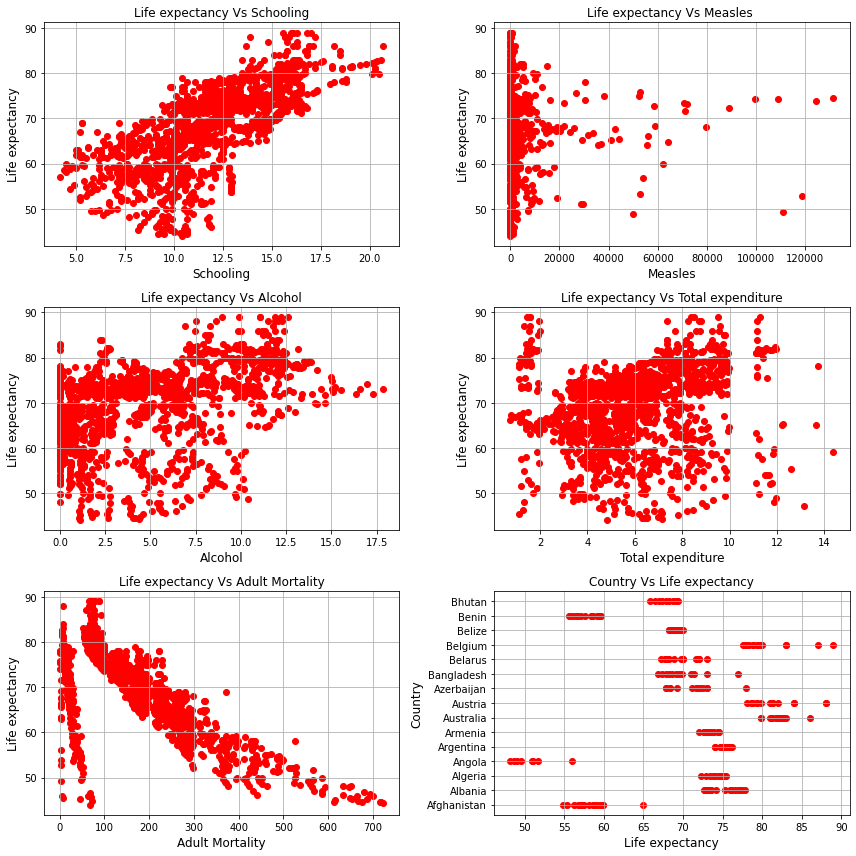

In [27]:
# Base it on Sub Plots so have everything together 

# Plot all the graphs together using subplot   - MATPLOT STYLE
plt.figure(figsize=(12,12))            
# Using subplots  
plt.subplot(3, 2, 1)
plt.scatter(data['Schooling'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Schooling', fontsize=12)
plt.xlabel('Schooling', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)

plt.subplot(3, 2, 2)
plt.scatter(data['Measles'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Measles ', fontsize=12)
plt.xlabel('Measles', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)

plt.subplot(3, 2, 3)
plt.scatter(data['Alcohol'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Alcohol', fontsize=12)
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)

plt.subplot(3, 2, 4)
plt.scatter(data['Total expenditure'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Total expenditure', fontsize=12)
plt.xlabel('Total expenditure', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)

plt.subplot(3, 2, 5)
plt.scatter(data['Adult Mortality'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Adult Mortality', fontsize=12)
plt.xlabel('Adult Mortality', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)

plt.subplot(3, 2, 6)
plt.scatter(data['Life expectancy'][:200], data['Country'][:200], color='red')
plt.title('Country Vs Life expectancy', fontsize=12)
plt.xlabel('Life expectancy', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
# Check if linear relationships exists between life expectancy and all other variables - Check Corr between different metrics




## Insights:

- Clearly, we can see in the above plot that, when the number of years of schooling is increasing, the Life expectancy is also increasing.
- The relationship is linear, as can be seen from the graph.

## Insights:

- Here, we see that, as the Adult Mortality is increasing, the Life expectancy is decreasing.
- So, there is inverse relationship between this feature on X-axis and the Target variable on Y-axis.
- Even though the relationship is inverse, but it is linear relationship, as can be seen from the graph.

## Insights:

- Life expectancy by the country is having a spread of data. (i.e. Some countries might have higher life expectancy and some lower, in the graph, we have plotted 200 data points which are from 15 countries (The names of countries are on Y-axis)
- However, we can see that the red dots are more to the right (near 90 years) for some countries and to the left (less than 50 years) for some countries.

In [ ]:
data.columns

In [28]:
#Check for correlations with Life Expectancy - Dont rely on Visualizations only
data.corr()['Life expectancy']

Year                               0.048813
Life expectancy                    1.000000
Adult Mortality                   -0.701994
Infant deaths                     -0.169851
Alcohol                            0.404599
Percentage expenditure             0.410205
Hepatitis B                        0.200082
Measles                           -0.068614
BMI                                0.539021
Under-five deaths                 -0.193204
Polio                              0.326638
Total expenditure                  0.171767
Diphtheria                         0.340601
HIV/AIDS                          -0.589850
GDP                                0.441974
Population                        -0.022757
Thinness  1-19 years              -0.456955
Thinness 5-9 years                -0.456491
Income composition of resources    0.722039
Schooling                          0.726637
Name: Life expectancy, dtype: float64

In [29]:
# Look at Alcohol a little more - Visuals can be confusing to figure out relationships
data['Alcohol_Bucket'] = pd.qcut(data['Alcohol'],q=8)
print(data['Alcohol_Bucket'].value_counts().sort_index())


(0.009000000000000001, 0.06]    212
(0.06, 0.81]                    204
(0.81, 1.978]                   206
(1.978, 3.75]                   208
(3.75, 5.488]                   207
(5.488, 7.325]                  207
(7.325, 10.16]                  208
(10.16, 17.87]                  207
Name: Alcohol_Bucket, dtype: int64


<ipython-input-29-3895acb4c322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Alcohol_Bucket'] = pd.qcut(data['Alcohol'],q=8)


In [30]:
temp_DF_Alcohol = pd.DataFrame(data.groupby(by='Alcohol_Bucket')[['Life expectancy','Alcohol']].agg('mean')).reset_index()
temp_DF_Alcohol

,Alcohol_Bucket,Life expectancy,Alcohol
0,"(0.009000000000000001, 0.06]",65.215566,0.013632
1,"(0.06, 0.81]",65.998039,0.421863
2,"(0.81, 1.978]",65.505825,1.376214
3,"(1.978, 3.75]",69.797115,2.798077
4,"(3.75, 5.488]",68.948309,4.525266
5,"(5.488, 7.325]",69.202899,6.398841
6,"(7.325, 10.16]",72.489423,8.630337
7,"(10.16, 17.87]",76.966184,11.969903


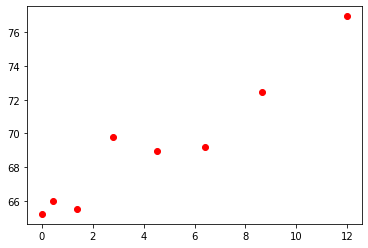

In [31]:
plt.scatter(temp_DF_Alcohol['Alcohol'],temp_DF_Alcohol['Life expectancy'],color='red')

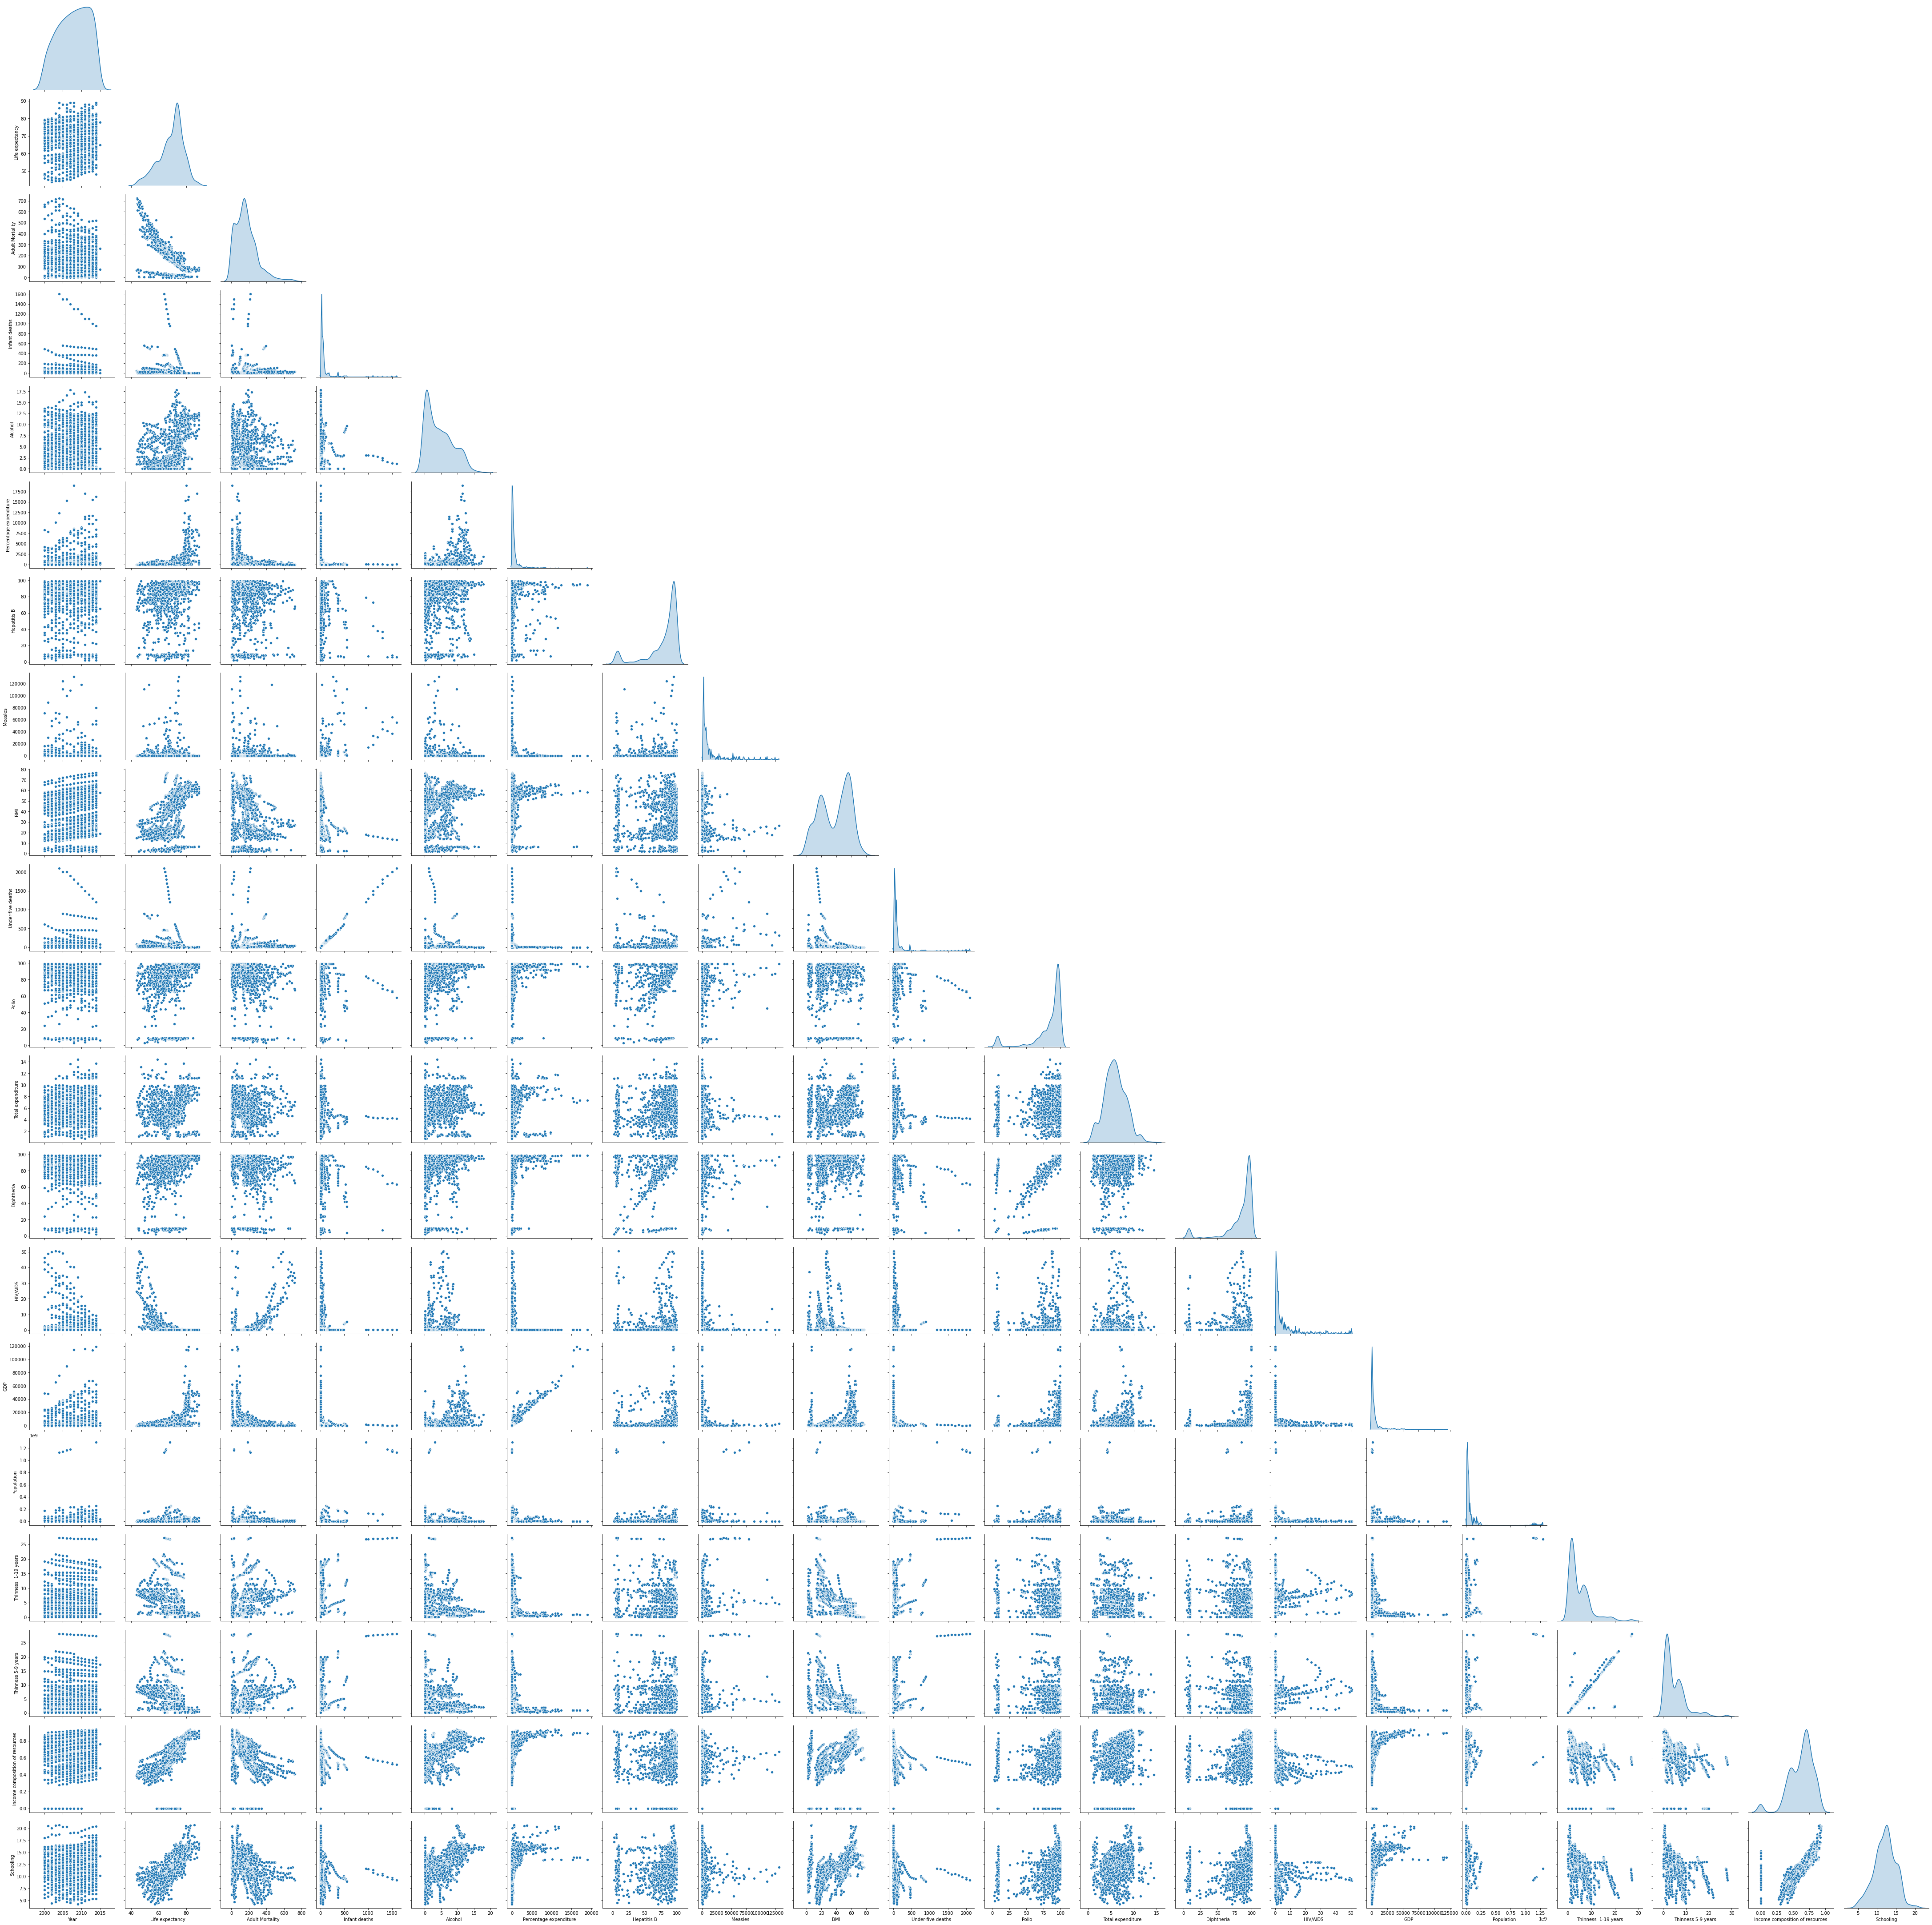

In [32]:
sns.pairplot(data, height=3, diag_kind='kde', corner=True)
plt.show()

## Insights:

- We can see from the 2nd and 3rd column of the graph that, these features have linear (or inversely linear) relationship.

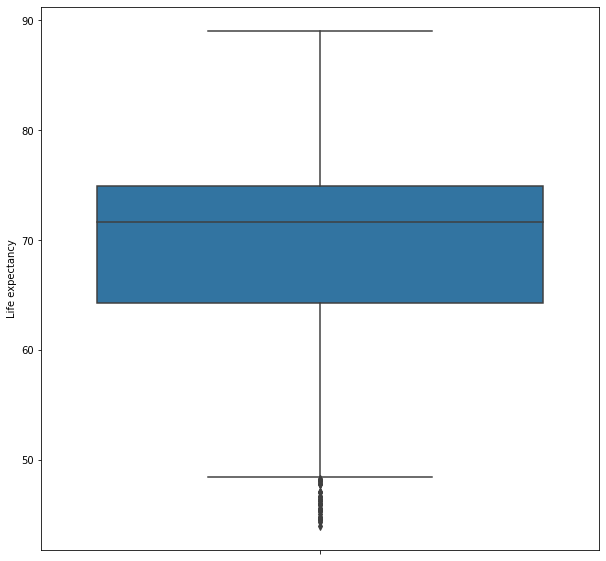

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(data['Life expectancy'], orient='v')
plt.show()

## Insights:

- The bottom black horizontal line of blue box plot is minimum value, which is around 48 years.
- First black horizontal line of rectangle shape of blue box plot is First quartile or 25 percentile. The age corresponding to this line is 64 years.
- Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median. The age corresponding to this is 72 years.
- Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%. The age corresponding to this is 75 years.
- Top black horizontal line of rectangle shape of blue box plot is maximum value. The value corresponding to this is 88 years.
- Small diamond shape of blue box plot is outlier data or erroneous data. Which is below the bottom black horizontal line.

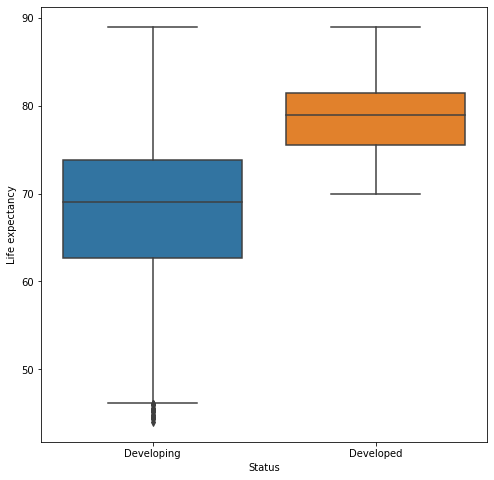

In [34]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Status",y="Life expectancy",data=data)
plt.show()

## Insights:

- The life expectancy in the developed countries is much higher than the developing countries.
- The median value of life expectancy (approximately as can be seen from the boxplot) for:
     - Developing: 69 years
     - Developed: 78 years

In [35]:
data[data.columns[:]].corr()['Life expectancy'][:]

Year                               0.048813
Life expectancy                    1.000000
Adult Mortality                   -0.701994
Infant deaths                     -0.169851
Alcohol                            0.404599
Percentage expenditure             0.410205
Hepatitis B                        0.200082
Measles                           -0.068614
BMI                                0.539021
Under-five deaths                 -0.193204
Polio                              0.326638
Total expenditure                  0.171767
Diphtheria                         0.340601
HIV/AIDS                          -0.589850
GDP                                0.441974
Population                        -0.022757
Thinness  1-19 years              -0.456955
Thinness 5-9 years                -0.456491
Income composition of resources    0.722039
Schooling                          0.726637
Name: Life expectancy, dtype: float64

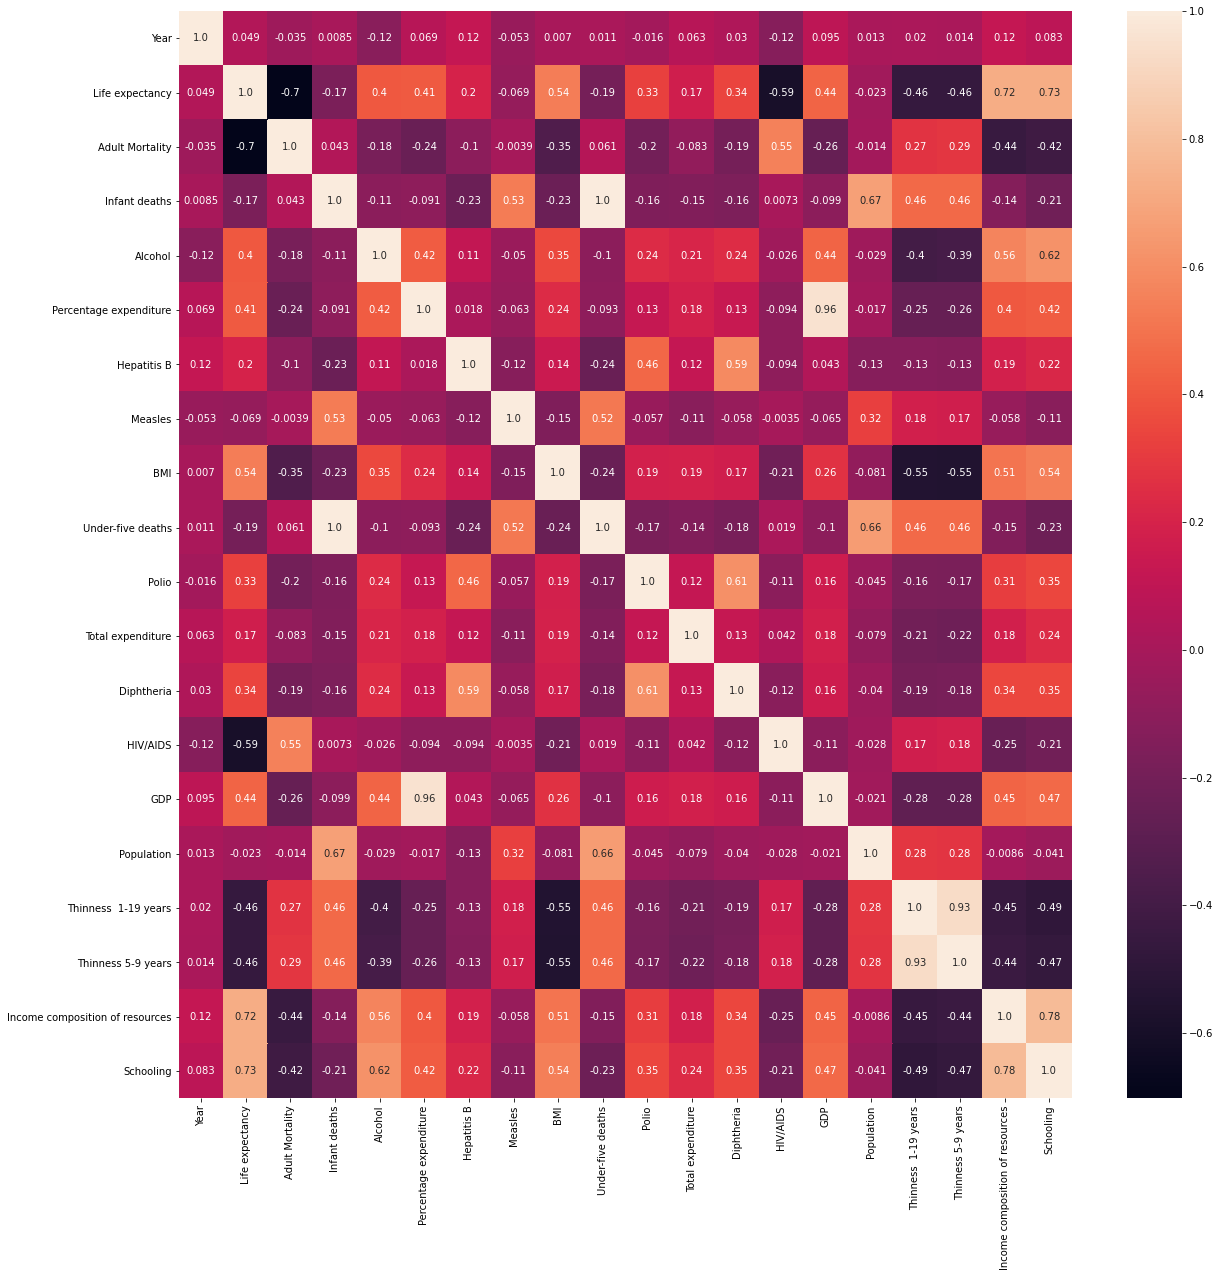

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

## Think about it:

- What is your interpretation from the above plot?

# <a id='link3'>Data Preparation</a>

In [37]:
#Creating extra copy of data for reference
data_copy = data.copy()

In [102]:
data = data_copy.copy()

In [103]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Population_Bucket', 'Alcohol_Bucket'],
      dtype='object')

In [104]:
#Create Dummy Variables
data = pd.get_dummies(data, columns=['Status'])

In [105]:
data.head(5)

,Country,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Population_Bucket,Alcohol_Bucket,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,"(25787136.0, 47554415.75]","(0.009000000000000001, 0.06]",0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,"(195793.25, 333304.0]","(0.009000000000000001, 0.06]",0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,"(25787136.0, 47554415.75]","(0.009000000000000001, 0.06]",0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,"(2761516.0, 3811579.75]","(0.009000000000000001, 0.06]",0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,"(2761516.0, 3811579.75]","(0.009000000000000001, 0.06]",0,1


In [106]:
#Drop columns
data.drop(columns = ['Year','Status_Developing','Country','Population_Bucket','Alcohol_Bucket'],axis=1,inplace=True)


In [107]:
X = data.drop('Life expectancy', axis=1)
y = data[['Life expectancy']]

print(X.head())
print(y.head())

   Adult Mortality  Infant deaths  Alcohol  Percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis B  Measles   BMI  Under-five deaths  Polio  Total expenditure  \
0         65.0     1154  19.1                 83    6.0               8.16   
1         62.0      492  18.6                 86   58.0               8.18   
2         64.0      430  18.1                 89   62.0               8.13   
3         67.0     2787  17.6                 93   67.0               8.52   
4         68.0     3013  17.2                 97   68.0               7.87   

   Diphtheria  HIV/AIDS         GDP  Population  Thinness  1-19 years  \
0        65.0       0.1  584.259210  

In [108]:
print(X.shape)
print(y.shape)

(1659, 19)
(1659, 1)


In [109]:
#X = pd.get_dummies(X, columns=['Country', 'Status'])
X.head(5)

,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Status_Developed
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


In [ ]:
# X.loc[:, 'Country'] = X.loc[:, 'Country'].astype('category')
# X.loc[:, 'Status'] = X.loc[:, 'Status'].astype('category')

# X.loc[:, 'Country'] = X.loc[:, 'Country'].cat.codes
# X.loc[:, 'Status'] = X.loc[:, 'Status'].cat.codes

# X.head()

In [110]:
X.head(5)

,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Status_Developed
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


In [44]:
type(X)

pandas.core.frame.DataFrame

In [111]:
X.values

array([[2.63e+02, 6.20e+01, 1.00e-02, ..., 4.79e-01, 1.01e+01, 0.00e+00],
       [2.71e+02, 6.40e+01, 1.00e-02, ..., 4.76e-01, 1.00e+01, 0.00e+00],
       [2.68e+02, 6.60e+01, 1.00e-02, ..., 4.70e-01, 9.90e+00, 0.00e+00],
       ...,
       [7.30e+01, 2.50e+01, 4.43e+00, ..., 4.27e-01, 1.00e+01, 0.00e+00],
       [6.86e+02, 2.50e+01, 1.72e+00, ..., 4.27e-01, 9.80e+00, 0.00e+00],
       [6.65e+02, 2.40e+01, 1.68e+00, ..., 4.34e-01, 9.80e+00, 0.00e+00]])

In [112]:
X = X.values
y = y.values

In [46]:
type(X)

numpy.ndarray

In [113]:
#split the data into train and test
from sklearn.model_selection import train_test_split   ##K Cross Fold Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# <a id='link4'>Choose Model, Train and Evaluate</a>

In [71]:
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)



pred = linearregression.predict(X_test)                              

Intercept of the linear equation: [54.38427532]

COefficients of the equation are: [[-1.82699253e-02  8.85214300e-02 -9.39985713e-02  2.26072016e-04
  -7.99193752e-03 -1.23110387e-05  1.94978578e-02 -6.65379432e-02
   3.99341053e-03  6.05843233e-02  1.93817506e-02 -4.14272587e-01
   2.09661237e-05 -4.72551279e-11 -5.25292937e-02 -5.49364076e-02
   8.28846073e+00  9.65563151e-01  9.68978851e-01]]


In [54]:
pred_train = linearregression.predict(X_train) 

In [50]:
# Mean Absolute Error
mean_absolute_error(y_test, pred),mean_absolute_error(y_train, pred_train) 

(2.8099267279656983, 2.710202963776451)

The mean absolute error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [55]:
# RMSE
mean_squared_error(y_test, pred)**0.5,mean_squared_error(y_train, pred_train)**0.5   # y_train,pred_train

(3.7190411474274865, 3.517804705854901)

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [73]:
# R2 Squared:
r2_score =r2_score(y_test, pred)                        
r2_score

0.8233474698796123

In [79]:
# How to get Adjusted R Sq. 
Adjr2_score = 1-(1-r2_score)*(data.shape[0]-1)/(data.shape[0]-(data.shape[1]-1)-1)
Adjr2_score

0.8212996370106145

In [57]:
data['Life expectancy'].var() # Variance in the predictor variable used in R2

77.17983007479737

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [58]:
# Training Score
linearregression.score(X_train, y_train)

0.8383475018557773

In [59]:
# Testing score
linearregression.score(X_test, y_test)

0.8233474698796123

#### Now compare the actual output values for X_test with the predicted values, execute the following script:

In [60]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
df

,Actual,Predicted
0,68.6,68.534719
1,75.0,74.024430
2,67.1,68.179613
3,54.3,62.728503
4,68.1,69.285971
...,...,...
493,61.9,62.886859
494,61.1,64.166260
495,78.0,71.399533
496,77.0,69.233559


- We can also visualize comparison result as a bar graph using the below script :

- Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

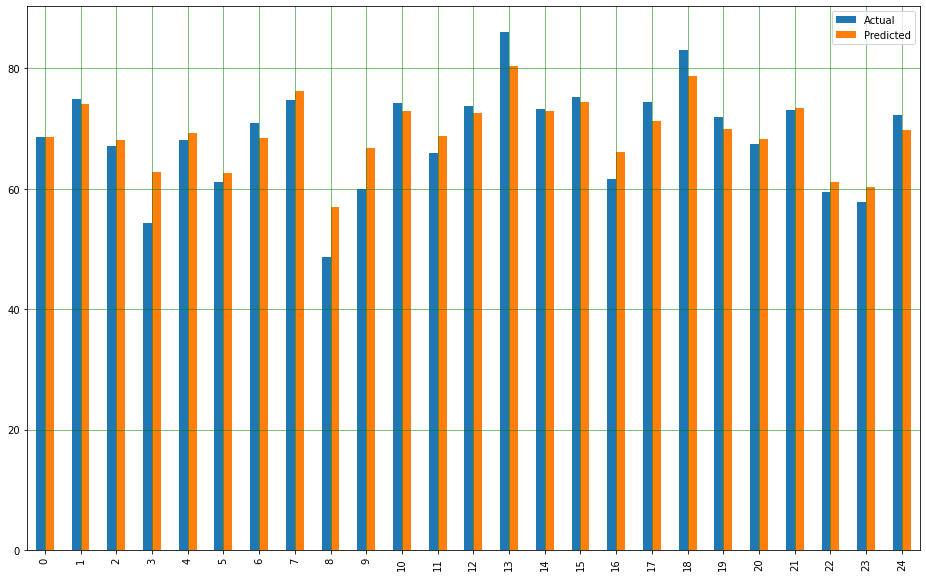

In [61]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

- We can observe here that our model has returned pretty good prediction results.
- The Actual and Predicted values are comparable.

# <a id='link5'>Conclusion</a>

- The Training and testing scores are around 95% and both scores are comparable, hence the model is a good fit.

- R2_score is 0.945, that explains 94.5% % of total variation in the dataset. So, overall the model is very satisfactory.

# <a id='link6'>Add-on: **statsmodels**</a>

- Here is the complete syntax to perform the linear regression in Python using statsmodels.

In [150]:
import statsmodels.api as sm

X = sm.add_constant(X)

linearmodel = sm.OLS(y, X).fit()

predictions = linearmodel.predict(X) 

print(linearmodel.summary(xname=['Intercept','Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed'])) # With Labels added


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     438.7
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:54:47   Log-Likelihood:                -4460.7
No. Observations:                1659   AIC:                             8961.
Df Residuals:                    1639   BIC:                             9070.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Deciding on better model based on Colliniearity in data, correlation of features with outpus and p values

In [115]:
data.columns[1:]

Index(['Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed'],
      dtype='object')

In [223]:
data.corr()['Population'].sort_values(ascending=False)

Population                         1.000000
Infant deaths                      0.671650
Under-five deaths                  0.658546
Measles                            0.321762
Thinness  1-19 years               0.282813
Thinness 5-9 years                 0.278151
Income composition of resources   -0.008644
Adult Mortality                   -0.014426
Percentage expenditure            -0.016946
GDP                               -0.020556
Life expectancy                   -0.022757
HIV/AIDS                          -0.027962
Alcohol                           -0.029348
Status_Developed                  -0.035028
Diphtheria                        -0.040028
Schooling                         -0.040976
Polio                             -0.045483
Total expenditure                 -0.078877
BMI                               -0.081069
Hepatitis B                       -0.128327
Name: Population, dtype: float64

In [172]:
# VIF - Variation Inflation Factor
# calculated for every column, if high then column correlated to other features in the data set 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(data.drop(['Infant deaths','Life expectancy','Schooling','Diphtheria','Income composition of resources'],axis=1).values, i) for i in range(data.drop(['Infant deaths','Life expectancy','Schooling','Diphtheria','Income composition of resources'],axis=1).shape[1])]
vif['variable'] = data.drop(['Infant deaths','Life expectancy','Schooling','Diphtheria','Income composition of resources'],axis=1).columns
vif.sort_values(by='VIF',ascending=False)

,VIF,variable
7,16.741996,Polio
10,16.338172,GDP
12,15.797508,Thinness 1-19 years
13,15.675699,Thinness 5-9 years
2,14.727836,Percentage expenditure
3,13.385469,Hepatitis B
8,7.433375,Total expenditure
5,6.158312,BMI
1,4.263459,Alcohol
0,4.035307,Adult Mortality


In [217]:
###New Model
XNew = data.drop(columns=['Life expectancy','Infant deaths','Diphtheria','Percentage expenditure','Hepatitis B', 'Alcohol','Thinness 5-9 years','Measles','Thinness  1-19 years'], axis=1)
yNew = data[['Life expectancy']]
XNew.columns

Index(['Adult Mortality', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'HIV/AIDS', 'GDP', 'Population',
       'Income composition of resources', 'Schooling', 'Status_Developed'],
      dtype='object')

In [218]:
XNew_values = XNew.values
yNew_value= yNew.values

In [219]:
XNew_values.shape

(1659, 11)

In [225]:
XNew_values = sm.add_constant(XNew_values)

linearmodel_New = sm.OLS(yNew_value, XNew_values).fit()

predictions = linearmodel_New.predict() 

print(linearmodel_New.summary(xname=['Intercept','Adult Mortality', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'HIV/AIDS', 'GDP', 'Population',
       'Income composition of resources', 'Schooling', 'Status_Developed']))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     702.2
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:15:13   Log-Likelihood:                -4516.4
No. Observations:                1659   AIC:                             9057.
Df Residuals:                    1647   BIC:                             9122.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.964**, which is good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Country, status, Adult mortality and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-248.7325**
3. **Status coeff**: It represents the change in the output Y due to a change in the status (everything else held constant).
4. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
5. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
6. **P >|t|**: It is p-value.
   - A p-value of less than 0.05 is considered to be statistically significant.
7. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

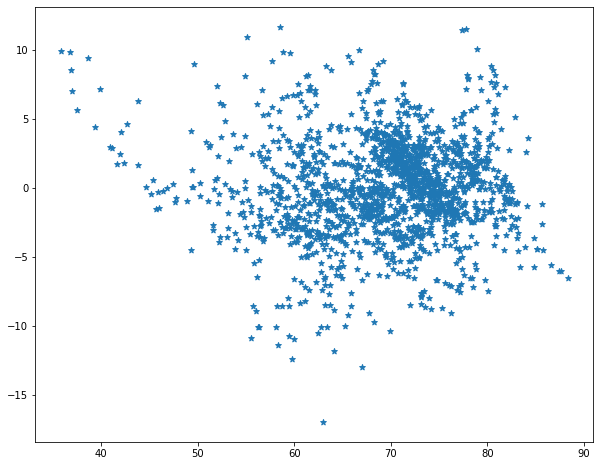

In [229]:
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(10,8))
plt.scatter(linearmodel_New.predict(), linearmodel.resid, marker='*')
plt.show()

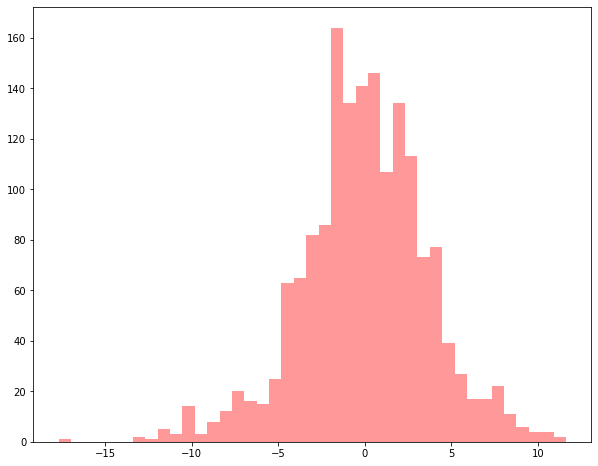

In [230]:
# error distribution
plt.figure(figsize=(10,8))
sns.distplot(linearmodel_New.resid, hist=True, kde=False, color='red')
plt.show()

# Appendix:


- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LinearRegression** : Ordinary least squares Linear Regression.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

- **statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    - An extensive list of result statistics are available for each estimator.
    - The results are tested against existing statistical packages to ensure that they are correct.
    - The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html).